In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html
quote_soup = soup(html, 'html.parser')

In [5]:
table_headers = quote_soup.find("table", class_="table")
table_headers

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [6]:
table_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
table_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [7]:
df = table_df[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
df["terrestrial_date"]= pd.to_datetime(df["terrestrial_date"])

In [9]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
number_of_months = np.unique(df['month'])
number_of_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [11]:
number_of_months=df['month'].max()
number_of_months
print("There are a total of",number_of_months,"months in mars")

There are a total of 12 months in mars


In [12]:
temp_df = df.groupby("month").mean()['min_temp']
temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

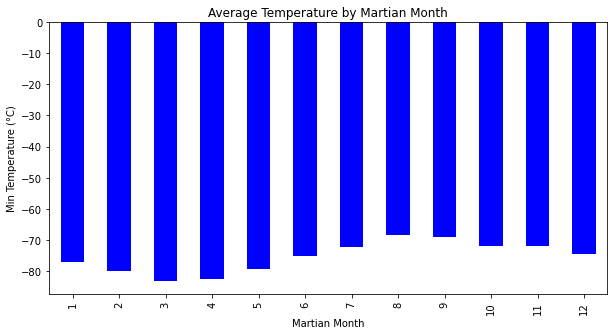

In [13]:
temp_plot = temp_df.plot(kind='bar', figsize=(10, 5), color='blue')
temp_plot.set_xlabel('Martian Month')
temp_plot.set_ylabel('Min Temperature (°C)')
temp_plot.set_title('Average Temperature by Martian Month')


plt.show()


     

In [14]:
temp_df_min = temp_df.min()

In [15]:
temp_df_min

-83.30729166666667

In [16]:
temp_df_max = temp_df.max()
temp_df_max

-68.38297872340425

In [17]:
print("On average the month that has the lowest temperature is month # 3 =",temp_df_min)
print("On average the month that has the highest temperature is month # 8 =",temp_df_max)

On average the month that has the lowest temperature is month # 3 = -83.30729166666667
On average the month that has the highest temperature is month # 8 = -68.38297872340425


In [18]:
atm_pressure_df = df.groupby("month").mean()['pressure']
atm_pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

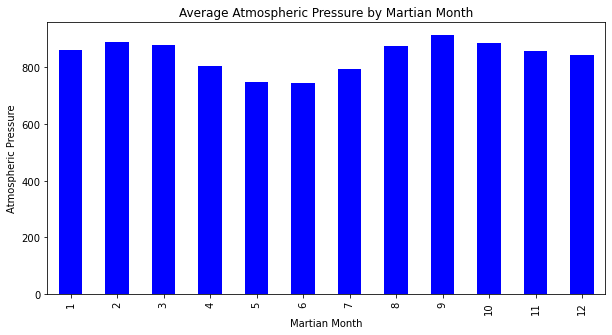

In [19]:
atm_pressure_plot = atm_pressure_df.plot(kind='bar', figsize=(10, 5), color='blue')
atm_pressure_plot.set_xlabel('Martian Month')
atm_pressure_plot.set_ylabel('Atmospheric Pressure')
atm_pressure_plot.set_title('Average Atmospheric Pressure by Martian Month')


plt.show()

In [20]:
atm_pressure_df_min =atm_pressure_df.min()
atm_pressure_df_min

745.0544217687075

In [21]:
atm_pressure_df_max =atm_pressure_df.max()
atm_pressure_df_max

913.3059701492538

In [22]:
print("On average the month that has the lowest atmospheric pressure is month # 6 =",atm_pressure_df_min)
print("On average the month that has the highest atmospheric pressure # 9 =",atm_pressure_df_max)

On average the month that has the lowest atmospheric pressure is month # 6 = 745.0544217687075
On average the month that has the highest atmospheric pressure # 9 = 913.3059701492538


In [23]:
total_sols =df['sol'].count()

print(total_sols)


1867


In [24]:
total_entries = df['id'].count()

print(total_entries)


1867


In [25]:
d1 = list(df.loc[df['id'] == 131]['sol'])[0]
d2 = list(df.loc[df['id'] == 432]['sol'])[0]

In [26]:
print("The number of terrestrial days that exist in a Martian year equals to", d2-d1)

The number of terrestrial days that exist in a Martian year equals to 262


In [27]:
df.to_csv('mars_data_challenge_part_2.csv', index=False)

In [ ]:
browser.quit()